# 목차

0. 개발환경
1. 검증용 데이터셋 준비
2. Keras-OCR, Tesseract로 테스트 진행<br>
    2-1. Keras-OCR<br>
    2-2. Tesseract<br>
3. 테스트 결과 정리(book2&book5 비교)<br>
    3-1. book2 비교<br>
    3-2. book5 비교<br>
4. 결과 분석과 결론 제시&회고

# 0. 개발환경

In [1]:
pip list | grep keras-ocr

keras-ocr                     0.8.8
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [3]:
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


# 1. 검증용 데이터셋 준비

## Neuroscience 전공책을 분류하는 서비스를 제공하고자 하는 목적의 데이터셋

In [7]:
img_dir = os.getenv('HOME')+'/aiffel/ocr_python/books'
books = os.listdir(img_dir)
books

['book1.jpg', 'book5.jpg', 'book4.jpg', 'book2.jpg', 'book3.jpg']

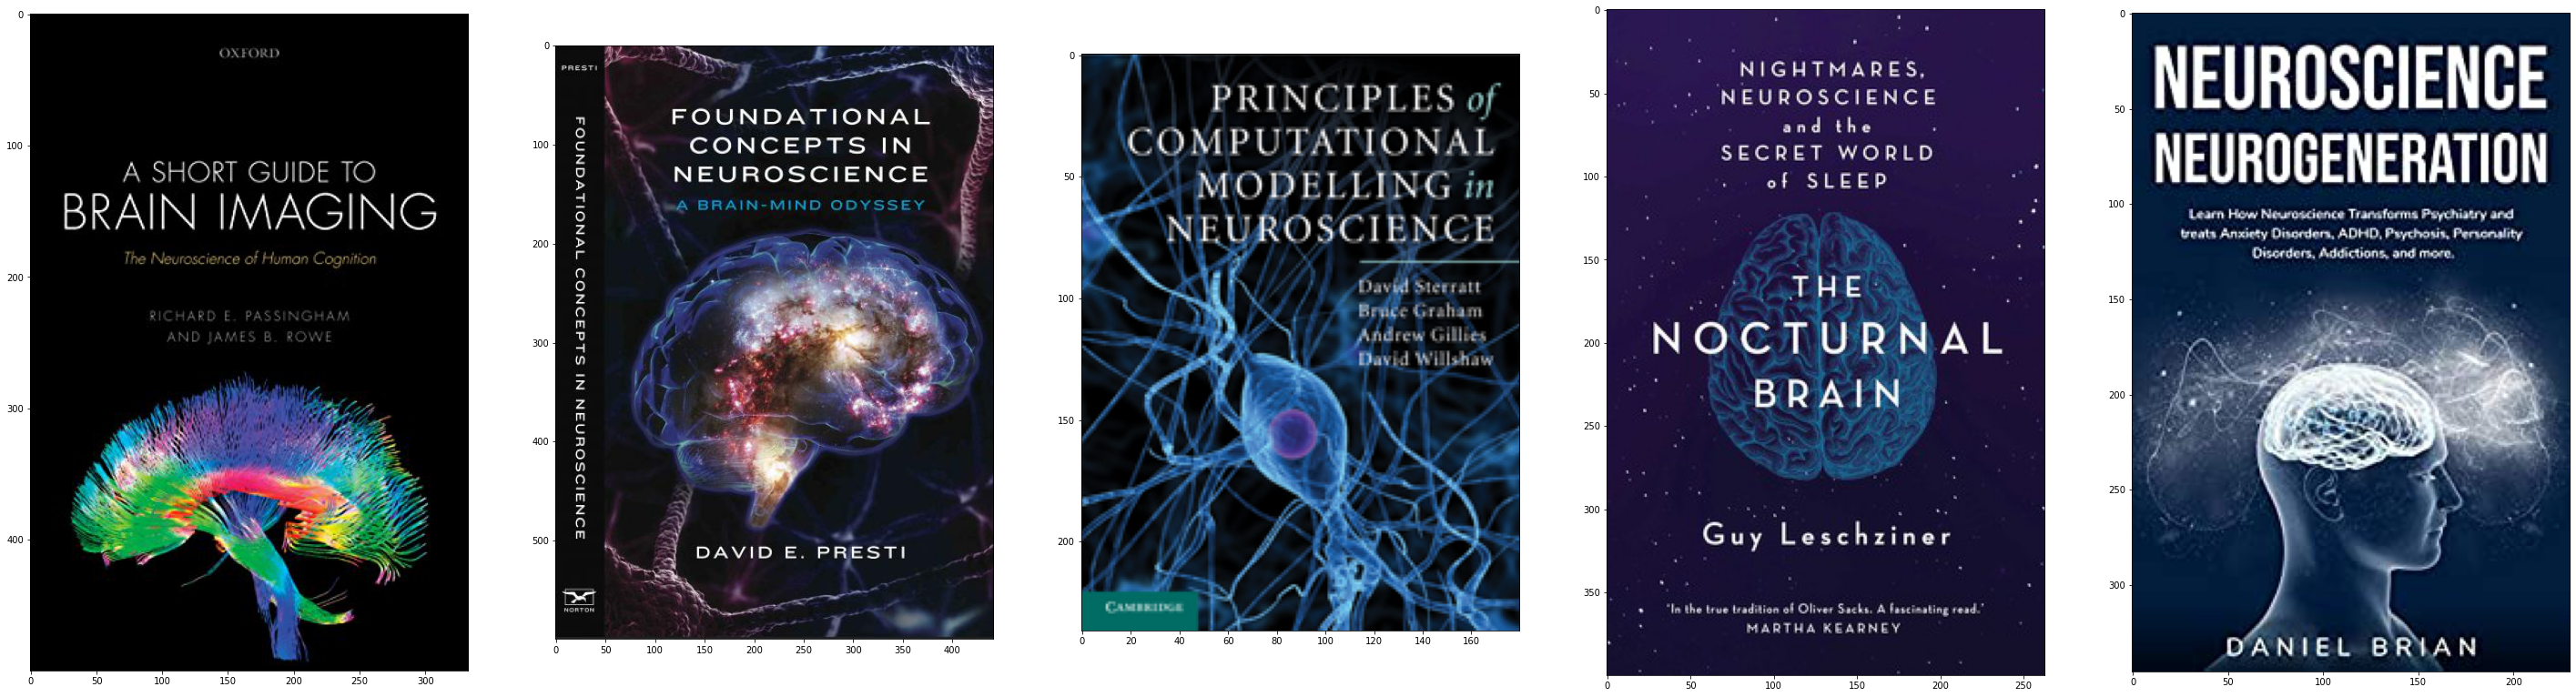

In [8]:
plt.figure(figsize=(50,50))

for idx, im in enumerate(books):
    im =  img_dir +'/' + im
    plt.subplot(1, 5, idx+1)
    im = img.imread(im)
    plt.imshow(im)

# 2. keras-ocr, Tesseract로 테스트 진행

## 2-1 Keras-OCR

In [9]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
# 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다.

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [10]:
images = [keras_ocr.tools.read(os.path.join(img_dir, book)) for book in books]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, book)]) for book in books]

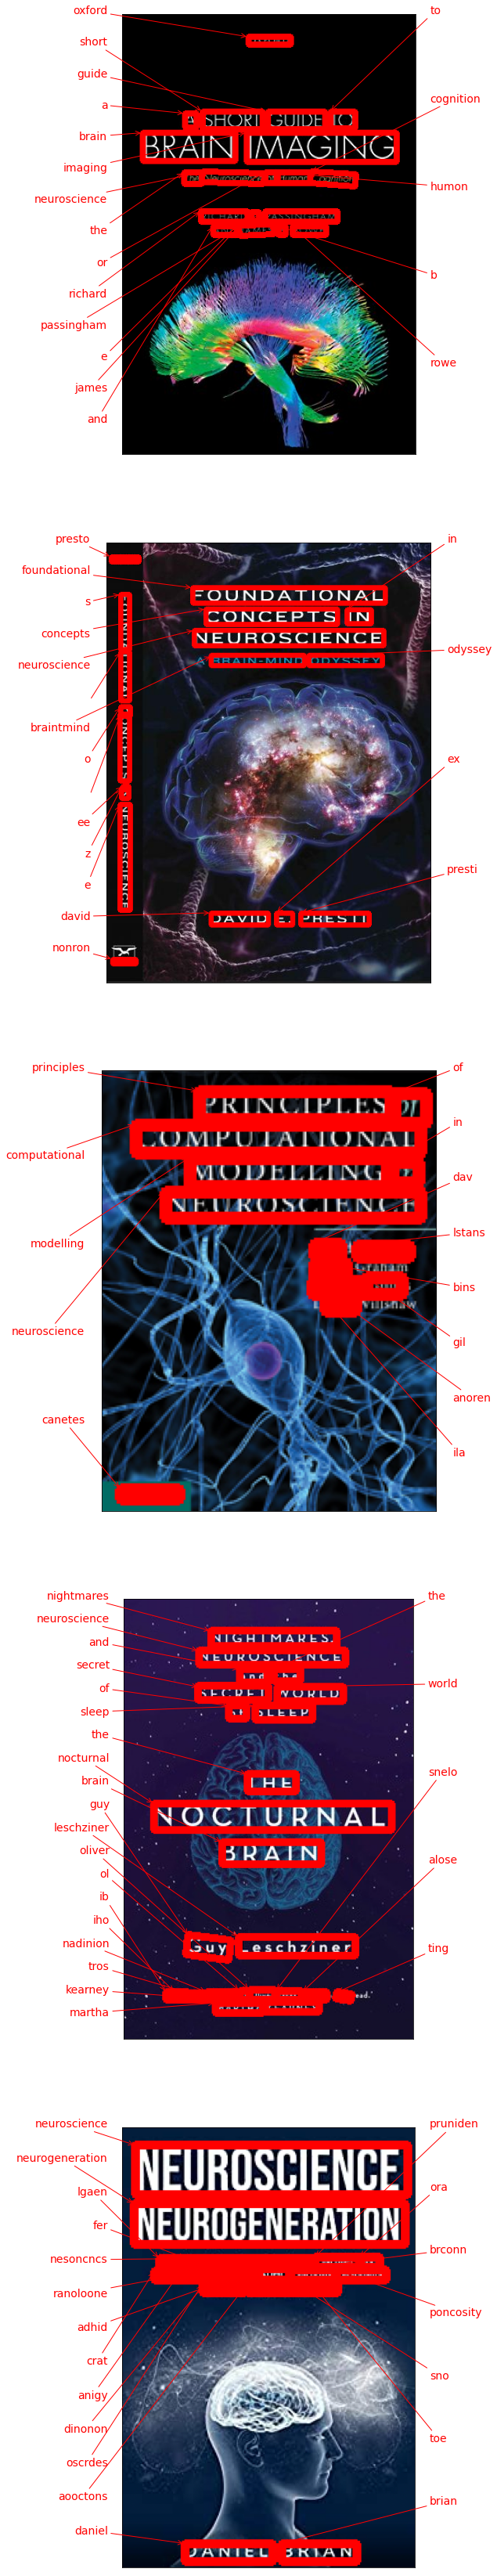

In [11]:
fig, axs = plt.subplots(nrows=len(images), figsize=(60, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

## 2-2. Tesseract

In [12]:
pip list | grep pytesseract

pytesseract                   0.3.8
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pytesseract
from PIL import Image
from pytesseract import Output

In [14]:
def recognize_images(image_path='./images/sample.png', output_path='./sample'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print('================================================\n')

[book1.jpg]


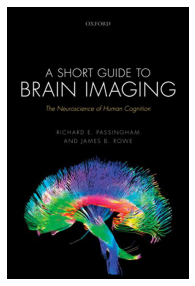

CON EC PRI

A

SHORT

(SUIDE

ie

By eA

ING

ihe Neuroscience of Mumoan

fee

=e

on ae meth oe

POS elar

B. ROWE



[book5.jpg]


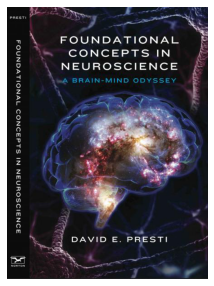

S

FOUNDATIONAL

—= SCONCE TS

i

NEUROSCIENCE

A

pee: ees ee ees ee.

(OID YS SE Y


os

@

=

ra

=

>

coal

©

ra

ms

=

(}

3e

Z

@

i

ae

—

Lf)

Z

Z

ty

2

Tt)

@

Uf)

2,

uy

vA

{ )

ul



[book4.jpg]


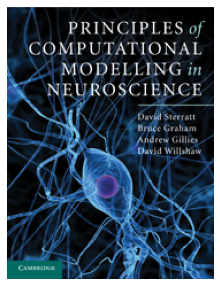

PRINCIPLES of

Ui

fore

[

eC ASR LOD TAGE

(os

00

;

hh

:

ray

eal



[book2.jpg]


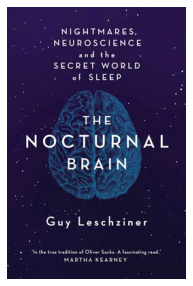

NIGH I MARES,

a

Tor

‘oT ase

eon Ons Sa

Aen se.

a

SLEEP

ean

NOCTURNAL

Py

a

Guy

Leschziner


[book3.jpg]


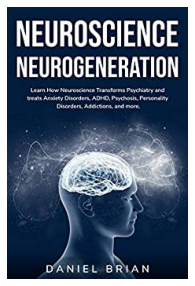

Val

HIN s

Vb

vas

ee ee ee

—s

, 9) a |

LYANTEL &

a




In [36]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/books/'

for idx, book in enumerate(books):
    if idx <6:
        print(f'[{book}]')
        plt.figure(figsize=(5,5))
        plt.imshow(img.imread(img_dir+'/'+book))
        plt.axis('off')
        plt.show()
        recognize_images(os.path.join(img_dir, book), save_dir)

---

# 3. 테스트 결과 정리(book2&book5 비교)

## 3-1 book2 비교
## -Keras OCR

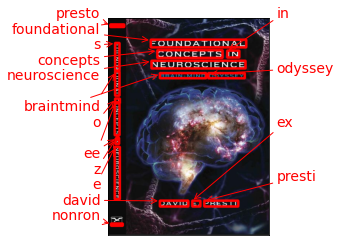

In [30]:
idx = books.index(book)

for idx, book in enumerate(books):
    if idx==1:        
        keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()

## -Tesseract

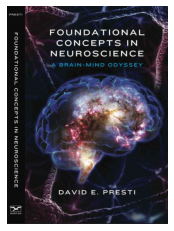

S

FOUNDATIONAL

—= SCONCE TS

i

NEUROSCIENCE

A

pee: ees ee ees ee.

(OID YS SE Y


os

@

=

ra

=

>

coal

©

ra

ms

=

(}

3e

Z

@

i

ae

—

Lf)

Z

Z

ty

2

Tt)

@

Uf)

2,

uy

vA

{ )

ul





In [43]:
for idx, book in enumerate(books):
    if idx==1:        
        plt.figure(figsize=(4,4))
        plt.imshow(img.imread(img_dir+'/'+book))
        plt.axis('off')
        plt.show()
        recognize_images(os.path.join(img_dir, book), save_dir)

---

## 3-2 book5 비교
## -Kereas OCR

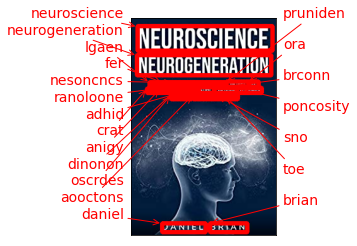

In [38]:
idx = books.index(book)

for idx, book in enumerate(books):
    if idx==4:        
        keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
plt.show()

## -Tesseract

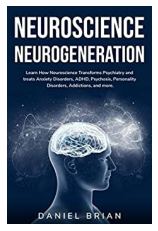

Val

HIN s

Vb

vas

ee ee ee

—s

, 9) a |

LYANTEL &

a




In [42]:
for idx, book in enumerate(books):
    if idx==4:        
        plt.figure(figsize=(4,4))
        plt.imshow(img.imread(img_dir+'/'+book))
        plt.axis('off')
        plt.show()
        recognize_images(os.path.join(img_dir, book), save_dir)

# 4. 결과 분석과 결론 제시&회고

Google OCR은 billing problem(결제 문제)가 자꾸 발생하여 시도하지 못했다.<br>
Neuroscience 전공책을 분류할때 쓸 수 있는 텍스트 인식기를 만들고자 하는 목적으로 데이터셋을 수집하였다.<br>

---

## **결과 간단 비교**<br>
### **book2**<br>

**-Keras-OCR**<br>
제목 Foundational concepts in neuroscience 완벽 식별<br>
부제목 A brain-mind odysseys를 A brantmind odysseys로 부분 완전 식별. -(하이픈)을 t로 식별함<br>
출판사 norton을 nonron으로 부분 완전 식별.<br>

**-Tesseract**<br>
제목 Foundational concepts in neuroscience를 <br>
Foundational -= sconce ts i neuroscience로 식별<br>
부제목 a brain-mind odyssey를<br>
a pee: ees ee ees ee. (oid ys se y 로 식별<br>

---
### **book5**<br>

**-Keras-OCR**<br>
제목 Neuroscience, neurogeneration 완벽 식별<br>
저자 Daniel Brian 완벽 식별<br>
부제목 Learn how neuroscience transforms Psychiatry and treats Anxiety disorder~~(이하생략)~~ 을<br>
lgaen fer nesoncncs ranoloone pruniden ora cart anigy dinonon으로 초월식별. <br>
언뜻보면 말도 안되게 번역했지만 화질구지 문제로 글씨가 깨져보이는 것을 최대한 알파벳으로 인식하려는 노력을 한 것을 볼 수 있음.<br>
예를들어 neuroscience를 nesoncncs, psychiatry를 prunuden로 변형 식별함. <br>
고화질의 이미지를 넣어주면 개선될 문제로 보인다. <br>
 
**-Tesseract**<br>
완전 의미불명의 결과물이 도출..

---

## **결론 및 보완점**<br>

### 결론
결론적으로 keras OCR이 Tesseract에 비교할때 훨씬 성능이 좋다고 말할 수 있다.<br> 

구글에서 긁어온 이미지들이 화질구지 문제가 있어서 양쪽 모두 완전한 성능을 내진 못했다.<br>
book2를 결과 비교에 넣은 이유: 제목과 그 밑의 저자, 출판사 등의 글씨 크기가 커서 컴퓨터가 그나마 쉽게 식별할 수 있다고 생각했다.<br>
book5를 결과 비교에 넣은 이유: 제목의 글자 사이즈는 식별에 충분하지만 그 밑의 다른 글자들이 '매우' 작아 이를 식별하는 keras OCR과 태서랙트의 성능을 비교하고 싶었다.

Keras OCR은 제목과 부제목과 같은 '큰 글씨'들은 상당한 수준의 적중률을 보였다.<br> 
하지만 Tesseract는 큰 글씨건 작은 글씨건 적중률이 현저히 떨어진다.<br>
Tesseract의 형편없는 성능은 데이터 이미지 자체가 구글에서 긁어온 것이라 화질구지 문제로 더 심각한듯 하다. <br>
보완점으로 차후 최고화질 이미지를 넣어 다시 시도해 볼 것. <br>

### 보완점
Keras-OCR: 글자를 식별하는 빨간 박스의 두께를 조절할 수 있는면 좋을 듯 하다. 두께를 줄여야 할 필요성이 있다.<br>
Tesseract: keras-ocr은 기본적으로 모두 소문자로 변환한 결과물을 내놓는다. 그런데 Tesseract는 대문자 소문자 식별부터 잘 되지 않고 중구난방으로 마구 섞인 결과물이 나온다.<br> 
더군다나 알파벳을 식별할때 keras-ocr은 최소한 존재하는 단어가 아니더라도 '알파벳'으로 식별 결과물을 내놓는 반면에, Tesseract는 알파벳을 각종 기호(-, =, (, +, 등등)로 잘못 식별하여 보여주는데 해독이 상형문자급이다. <br>
아무리 데이터의 화질이 안좋더라도 Keras-OCR에 비교해 기능 개선 매우 요망!!.<br> 